$\newcommand{\bb}{\boldsymbol{\beta}}$
$\DeclareMathOperator{\Gau}{\mathcal{N}}$
$\newcommand{\bphi}{\boldsymbol \phi}$
$\newcommand{\bx}{\boldsymbol{x}}$
$\newcommand{\bu}{\boldsymbol{u}}$
$\newcommand{\by}{\boldsymbol{y}}$
$\newcommand{\whbb}{\widehat{\bb}}$
$\newcommand{\hf}{\hat{f}}$
$\newcommand{\tf}{\tilde{f}}$
$\newcommand{\ybar}{\overline{y}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\Var}{Var}$
$\newcommand{\Cov}{Cov}$
$\newcommand{\Cor}{Cor}$

In [29]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
#seaborn is a module for figures
import seaborn as sns
import numpy as np
import sklearn
from sklearn.metrics import mean_squared_error as mse

In [2]:
cdata = pd.read_csv('curve_data.csv')

In [3]:
cdata.head()

,x,y
0,0.0000,0.0528
1,0.1111,0.7980
2,0.2222,0.8486
3,0.3333,0.8719
4,0.4444,0.1732


# Linear Regression

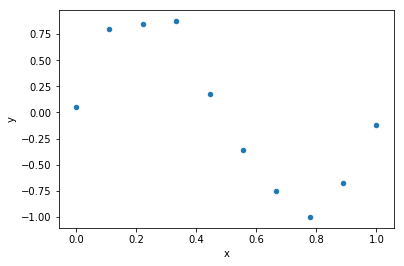

In [6]:
cdata.plot("x", "y", kind="scatter")

***y the target variable normally distrubuted with a mean that is function of our input variable and some parameters, we aim to learn this function through training data***

$$ y_i \sim \Gau(f(x_i,\bb) , v)$$

***The function we aim to learn***

$$ f(x,\mathbf{\beta}) = \beta_0 + \beta_1 x$$

***Parameters, that is gonna be estimated and it is unknow at time being***

$$ \bb = (\beta_0,\beta_1)^T$$

In [7]:
from sklearn.linear_model import LinearRegression

In [15]:
regr = LinearRegression()

X = cdata.x.values.reshape(-1, 1)
y = cdata.y.values.reshape(-1, 1)

## Fitting linear regression and comparing learned function to real data

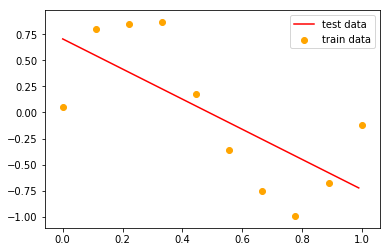

In [16]:
regr.fit(X, y)
X_new = 0.01*np.arange(100).reshape(-1, 1)
f_new_pred = regr.predict(X_new) 
# Plot the random data
plt.figure()
# plot training data
plt.scatter(X, y, c="orange", label="train data")
plt.plot(X_new, f_new_pred, c="red", label="test data")
plt.legend()

## A better learning function: linear in parameters and features, non-linear in input

\begin{equation}
y_i \sim \Gau(f(x_i,\bb) , v)
\end{equation}

***Now the function we aim to learn is linear on parameters but non-linear on input***

$$ f(x,\bb) = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots \beta_n x^{p-1} $$

***We transform input and we create features***

$$\bphi_i =(1,x_i,x_i^2,\ldots,x_i^{p-1})^T$$ 

***Then the function we aim to learn is linear combination of parameters and features***

$$ f(x_i,\bb) = \bb^T \bphi_i$$


## Log-Likelihood and Negative Log-Likelihood

***Normal Distrubution***

\begin{equation}
\Gau(x \mid \mu, \sigma^2) = \frac{1}{2\pi \sigma^2} \cdot exp(-\frac{1}{2\sigma^2} \cdot (x - \mu)^2)
\end{equation}

***Likelihood of x given mean***

\begin{equation}
p(x \mid \mu, \sigma^2) = \prod \Gau(x_n \mid \mu, \sigma^2)
\end{equation}

***Taking log of this gives the log-likelihood***

\begin{equation}
lnp(x \mid \mu, \sigma^2) = -\frac{N}{2}ln(2\pi) - \frac{N}{2}ln(\sigma^2) - \frac{1}{2\sigma^2} \sum (x_n - \mu)^2
\end{equation}

 - We maximize function with respect to mean, meaning we maximize the probabilty to observe given X with respect to mean and the mean we obtain is true mean if our sample is large and independent.
 - Normally we try to estimate some parameters, if we replace the mean with $f(x,\bb)$, we maximize this function with respect to $f(x,\bb)$ then we obtain parameters $\bb$
 
***Maximizing this function equivalent to minimizing negative of this function***

\begin{equation}
-lnp(x \mid \mu, \sigma^2) = \frac{N}{2}ln(2\pi) + \frac{N}{2}ln(\sigma^2) + \frac{1}{2\sigma^2} \sum (x_n - \mu)^2
\end{equation}

***Since we maximize over $\mu$ first term is irrelevant, thus our loss function, so called log loss***

\begin{equation}
L(\bb,\sigma^2) = \frac{N}{2}ln(\sigma^2) + \frac{1}{2\sigma^2} \sum (y_n - f(x_n,\bb))^2
\end{equation}

***$R^2$ model metric which is correlation square between fitted and observed variables***

$$R-squared = 1 - {\sum_i (y_i - \hf_n(\bx_i))^2 \over \sum_i (y_i - \ybar)^2} = 1 - \frac{SSE}{TSS}$$

***Note that we assumed y is coming from a normal dist.***

## Transformers and Scalers

In [17]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer # for caterogical targets
from sklearn.preprocessing import MultiLabelBinarizer # multilabel caterogical targets

## Non-linear features fit

In [21]:
from sklearn.preprocessing import PolynomialFeatures as plf

poly = plf(3) # it also adds interactions, and intercept
F = poly.fit_transform(X) #F for fearure matrix
# Intercept, Original Var., Power to 2, Power to 3

In [19]:
regr  = LinearRegression(fit_intercept=False) # poly transform added intercept
regr.fit(F,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

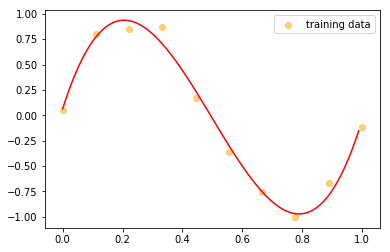

In [23]:
X_new = 0.01*np.arange(100).reshape(-1, 1)
F_new = plf(3).fit_transform(X_new)
y_pred = regr.predict(F_new) 
plt.figure()
plt.scatter(X, y, c="orange", label="training data", alpha=0.5)
plt.plot(X_new, y_pred, c="red")

plt.legend()

## Model Evaluation

***Estimated MSE and $R^2$ from the sample may not be good estimators of the population***

0.006378072040263074


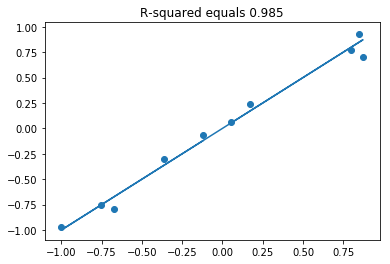

In [39]:
y_pred = regr.predict(F)
plt.scatter(y, y_pred)
plt.plot(y, y)
rho = pd.Series(y.reshape(-1,)).corr(pd.Series(y_pred.reshape(-1,)))
plt.title('R-squared equals %.3f' %rho**2)
print(mse(y, y_pred))

***We can use leave-one-out prediction to create an artificial out-of-sample data***

In [40]:
from sklearn.model_selection import cross_val_predict as cvp

0.023920746765977025
Note that MSE increased quite a bit


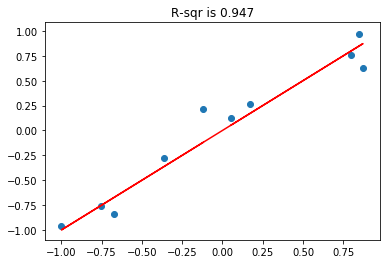

In [42]:
y_pred_cv = cvp(regr, F, y, cv=10)
plt.scatter(y, y_pred_cv)
plt.plot(y, y, c="red")
rho = pd.Series(y.reshape(-1,)).corr(pd.Series(y_pred_cv.reshape(-1,)))
plt.title("R-sqr is %.3f" %rho**2)
print(mse(y, y_pred_cv))
print("Note that MSE increased quite a bit")

***If we increase model complexity even more***

0.003946106768997747


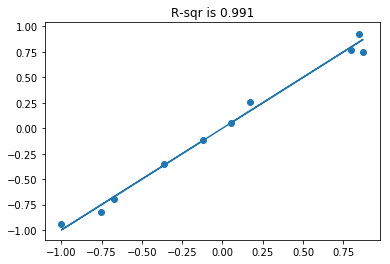

In [47]:
poly = plf(7)
f_new = poly.fit_transform(X)
regr = LinearRegression(fit_intercept=False)
regr.fit(f_new, y)
y_pred = regr.predict(f_new)
plt.scatter(y, y_pred)
plt.plot(y, y)
rho = pd.Series(y.reshape(-1,)).corr(pd.Series(y_pred.reshape(-1,)))
plt.title("R-sqr is %.3f" %rho**2)
print(mse(y, y_pred))

18.12403885400844
Note that MSE fucked up


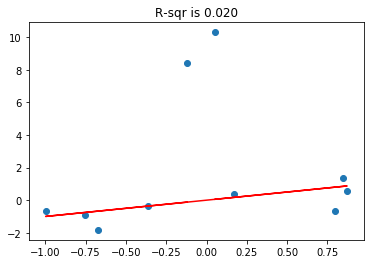

In [48]:
y_pred_cv = cvp(regr, f_new, y, cv=10)
plt.scatter(y, y_pred_cv)
plt.plot(y, y, c="red")
rho = pd.Series(y.reshape(-1,)).corr(pd.Series(y_pred_cv.reshape(-1,)))
plt.title("R-sqr is %.3f" %rho**2)
print(mse(y, y_pred_cv))
print("Note that MSE fucked up")

## The bias-variance tradeoff in Statistics and Machine Learning

Define Bias and Variance first:

$bias(\hat{y}) = E(\hat{y}) - y$

$var(\hat{y})= E(\hat{y} - E(\hat{y}))$

Mean Squared Error: $E(\hat{y} - y)^2$

$E(\hat{y} - y)^2$

= $E((\hat{y} - E(\hat{y})) + (E(\hat{y}) - y))$ substract $E(\hat{y})$ and add $E(\hat{y})$

= $E(\hat{y} - E(\hat{y}))^2 + 2E(\hat{y} - E(\hat{y}))(E(\hat{y}) - y) + E(E(\hat{y}) - y))^2$

= $E(\hat{y} - E(\hat{y}))^2 + (E(\hat{y}) - y)^2$

= $Variance + bias^2$

Now note that $y$ is constant for variance to increase $E(\hat{y})$ needs to decrease and as $E(\hat{y})$ decrease bias decrease that is the bias-variance tradeoff

Below figure shows estimated $y$ from different data-sets as the regularization coefficient of lasso(lambda) decrease, variance increase (last plot, model becomes more flexible, can fit training data better) bias decrease 

## Degrees of Freedom

***Degrees of Freedom in ML simply refers to number of parameters rather than classical n-k, so concept is different here***

+ *Procedures* with *few degrees of freedom* are stable but the learning function they estimate can be systematically far off from the optimal one (**bias**). They would have comparable R-squared and leave-one-out CV R-squared

+ *Procedures* with *high degrees of freedom* are sensitive to training data (**variance**) but the learning function they estimate might not have systematic differences from the optimal one. They would have near-1 R-squared and near-0 leave-one-out CV R-squared 

It is important to understand that these properties involve **both the model and the loss function** - this is why I tactically used the vague term *procedure* above: it is the combination of both - what we might call "algorithm" - that matters



## A framework for good predictive algorithms: penalized likelihood methods

We now see *algorithms* that achieve a good bias-variance tradeoff and allow us to fit linear models with very large number of features

The training will select the few important features

We focus on the coefficients $\bb$: since their estimation did not require knowledge of $v$, we simplify (and rescale) the loss function we derived earlier to 

$$L(\bb) =  {1 \over 2 n} \sum_{i=1}^n (y_i - f(\bx_i,\bb))^2$$ 

**shrinkage methods**; they are based on changing the loss function to 

$$L(\bb) =  {1 \over 2 n} \sum_{i=1}^n (y_i - f(\bx_i,\bb))^2 + \lambda \sum_{j=1}^{p-1} g(\beta_j)$$ 

where $g(\beta_j)$ is a **penalty** term, that penalizes $\beta_j$ when $\beta_j \neq  0$; recall that $\beta_j = 0$ means that feature $j$ (e.g., $j-1$ polynomial order) is dropped from the model

We add a punishment for the parameters that takes high values

+ LASSO: $g(\beta) = |\beta|$

+ ridge regression: $g(\beta) = \beta^2$

+ Feature standardization: 
    + Different coefficients are penalized in the same way: this only makes sense if the different coefficients are comparable, thus we scale the features otherwise 0.0001 punishment on a parameter that takes the value 1000 increase the loss function quite a lot compared to a feature that takes the value 0.5

<img src = "penalties.png" width ="400">

***Notice lasso is not differentiable at 0 so coeff. directly set to 0. Ridge is differentiable around 0 so we shrink coeff. rather than setting them to 0***

In [52]:
order = 9
poly = plf(order)
Flarge = poly.fit_transform(X)[:,1:] # drop the intercept column

from sklearn.preprocessing import scale as scl
Flarge = scl(Flarge)

[ 2.63865824 -6.71335294  0.          3.8287344   0.73806078  0.
  0.         -0.         -0.75468764]


TypeError: __call__() missing 1 required positional argument: 'y_true'

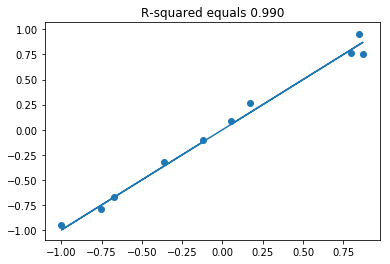

In [75]:
from sklearn.linear_model import Lasso
#alpha is what was lambda in our notation
regr_lasso = Lasso(alpha=0.0001, fit_intercept=False,warm_start=True,max_iter=1000000)

# application to our data and model
regr_lasso.fit(Flarge,y)
print(regr_lasso.coef_)
y_pred = regr_lasso.predict(Flarge)
plt.scatter(y, y_pred)
plt.plot(y, y)
rho = pd.Series(y[:,0]).corr(pd.Series(y_pred))
plt.title('R-squared equals %.3f' %rho**2)
print(mse(y, y_pred))

0.022522402280192803
Notice change in MSE is ok compared to fittin Lin Reg. with Poly of order 7


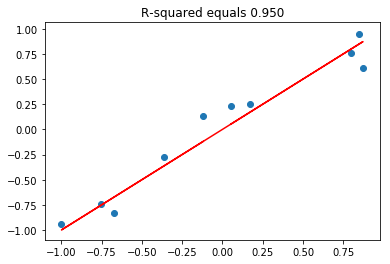

In [57]:
y_hat_cv = cvp(regr_lasso, F, y, cv=10)
plt.figure()
plt.scatter(x=y,y=y_hat_cv) 
plt.plot(y,y,c="red")
rho = pd.Series(y[:,0]).corr(pd.Series(y_hat_cv))
plt.title('R-squared equals %.3f' %rho**2)
print(mse(y, y_hat_cv))
print("Notice change in MSE is ok compared to fittin Lin Reg. with Poly of order 7")

## Further insights & observations on lasso

+ Sparsity: increasing values of $\lambda$ have the effect that an increasing number of estimated coefficients are exactly zero
+ Variable selection: hence, implictly lasso also performs a principled feature selection - but this is not an aspect we will explore here
    + Lets see these properties in action in our example. Lets look at the coefficients for a range of $\lambda$ values
    
- Lasso Path shows evaluation of coefficient through different regularization coefficients as we go through right to X axis, we relax the regularization coefficient and coefficients becomes larger, this plot does not really give us anything useful but still good plot to see whats happening to our coefficients

.

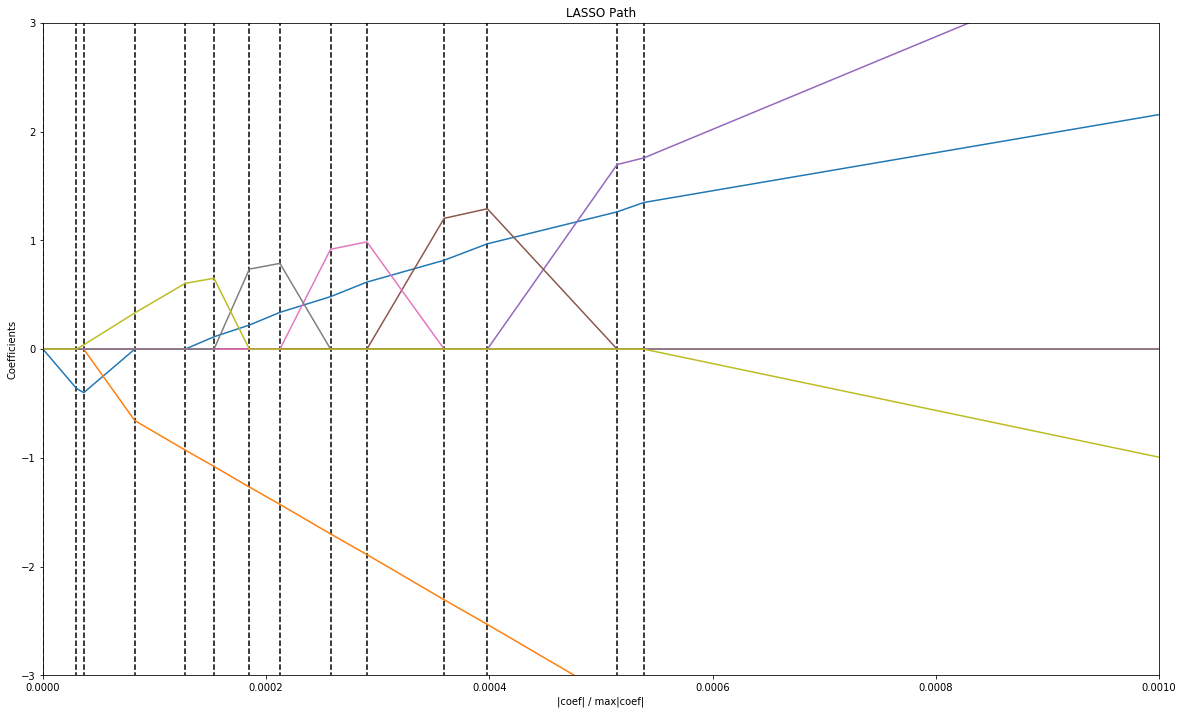

In [58]:
from sklearn.linear_model import lars_path 

alphas, _, coefs = lars_path(Flarge, y[:,0], method='lasso', 
                             verbose=True, max_iter = 100000)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
plt.figure(figsize=(20,12))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.xlim(0,0.001)
plt.ylim(-3,3)
plt.show()

## Choosing the regularization hyperparameter

Given an estimator of $MSE_n$ we can choose $\lambda$ to achieve an MSE as small as possible. For example leave-one-out cross validation. 

Another possibility is to use a **model selection** criterion. Model selection criteria balance in-sample fit with **model complexity**. ***-> AIC, BIC***

First, we try leave-one-out CV in our example. 

In [59]:
from sklearn.model_selection import GridSearchCV

# you may wonder why I set random_state now and did not do so before
lasso = Lasso(random_state=0,max_iter=3000000) 
alphas = np.array([0.000007, 0.00002, 0.00004, 0.00005,0.00008,0.0001,0.00012, 0.00015,0.0002,0.00025,0.0003,0.0004,0.0005,0.0006,0.0007,0.002])

tuned_parameters = [{'alpha': alphas}]
n_folds = 10 # remember that for this dataset this is leave-one-out

In [60]:
from sklearn.metrics import mean_squared_error, make_scorer 

## ALWAYS read carefully documentation. copying here from make_scorer
## greater_is_better : boolean, default=True
# "Whether score_func is a score function (default), meaning high is 
# good, or a loss function, meaning low is good. 
# In the latter case, the scorer object will sign-flip 
# the outcome of the score_func.
mse = make_scorer(mean_squared_error,greater_is_better=False)


clf = GridSearchCV(lasso, tuned_parameters, scoring = mse, 
                   cv=n_folds, refit=False)

clf.fit(Flarge, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
std_error = scores_std / np.sqrt(n_folds)

(7e-06, 0.002)

/Users/guneykan/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/guneykan/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1250: UserWarning: findfont: Could not match :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /Library/Fonts/STIXSizTwoSymBol.otf.
  UserWarning)
/Users/guneykan/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/guneykan/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/guneykan/anaconda3/lib/python3.7/site-packa

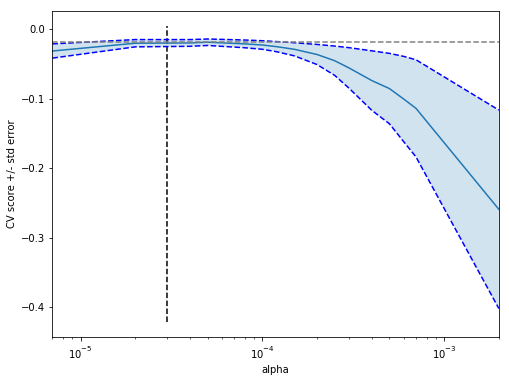

In [63]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
ymin, ymax = plt.ylim()
plt.vlines([0.00003] ,ymin, ymax, linestyle='dashed')
plt.xlim([alphas[0], alphas[-1]])

## Using AIC for reg. parameter selection, and AIC function

In [66]:
from sklearn import linear_model
clf = linear_model.LassoLarsIC(criterion='aic')
clf.fit(Flarge, y)

# AIC function
def aic(y, y_pred, k):
    resid = y - y_pred.ravel()
    sse = sum(resid**2)
    aic = 2*k - 2*np.log(sse)
    return aic

/Users/guneykan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
